# Part II - Prosper Loan Exploratory Analysis
## by Joshua Ati

## Investigation Overview

> The main goal of this exploratory project is to analyze the relationship between certain variables that affect how individuals recieve loans, the amount and the interest rate they may get. The key summary is that the people with the most advantage are people that are employed, have homes, are deemed low risk, have a higher income range and access one year loans. They get the lowest interest rate and are likely to get higher loan amounts.


## Dataset Overview

> The dataset contains 113,937 loan observations and 81 variables such as Listing category, Borrower's state, Interest Rate, Income Range, Listing Date, Investors, etc. From those 81 variables, I extracted 19 variables to work with to provide insight on my area of interest. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")



In [2]:
# load in the dataset into a pandas dataframe
loan_clean = pd.read_csv('ProsperLoanDataCleaned.csv')

In [3]:
#initializing Seaborn
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (15,15)})
plt_color = '#CC8963'
title_font = {'family': 'Clarendon BT', 'size': 17}
label_font = {'family': 'Century751 SeBd BT', 'size': 14}

In [4]:
#defining a horizontal count graph plotting function
def Countplty(y, title, xlabel, ylabel):
    '''This function plots horizontal count graphs
    '''
    #arrange the bars in order of frequency
    count_a = y.value_counts()
    count_b = y.value_counts(normalize = True)*100

    #plot the count graph
    ax = sns.countplot(y = y, order = count_a.index, color = plt_color)

    #create the labels
    label = [f' {p[0]} | {p[1]:.2f}%' for p in zip(count_a, count_b)]
    ax.bar_label(container=ax.containers[0], labels=label)
    
    #graph labels
    plt.title(title, fontdict = title_font)
    plt.xlabel(xlabel, fontdict = label_font)
    plt.ylabel(ylabel, fontdict = label_font)
    plt.xticks([])

In [5]:
#defining a vertical count graph plotting function
def Countpltx(x, title, xlabel, ylabel):
    '''This function plots vertical count graphs
    '''
    #arrange the bars in order of category
    count_a = x.value_counts().sort_index()
    count_b = x.value_counts(normalize = True).sort_index()*100

    #plot the count graph
    ax = sns.countplot(x = x, color = plt_color)

    #create the labels
    label = [f'{p[0]} | {p[1]:.2f}%' for p in zip(count_a, count_b)]
    ax.bar_label(container=ax.containers[0], labels=label)

    #display graph labels
    plt.title(title, fontdict = title_font)
    plt.xlabel(xlabel, fontdict = label_font)
    plt.ylabel(ylabel, fontdict = label_font)

In [6]:
#creating a function to plot histograms in pairs
def Histplt(plt_no, x, title, xlabel, ylabel, lln, bn):
    '''This function plots histograms in pairs of 2'''
    #define subplots
    ax = plt.subplot(1,2,plt_no)
    
    #defining bins
    bins = np.arange(lln, loan_clean[x].max()+bn, bn)
    
    #plot the histogram
    plt.hist(loan_clean[x], bins = bins, color=plt_color)

    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font);

In [7]:
#creating a function to plot both violin and boxplot
def BV_plot(pltnr, types, x, y, title, xlabel, ylabel):
    '''This function plots a violin or box plot in pairs'''
    
    #subplot
    plt.subplot(1, 2, pltnr)

    #input the type of graph and other parameters
    types(data = loan_clean, x=x, y=y, color=plt_color)
    
    #display graph labels
    plt.xticks(rotation = 90)
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)

In [8]:
#creating a function to plot bargraphs
def Barplt(subplot, x, y, huecol, title, xlabel, ylabel):
    '''This function plots bar graphs alone or in pairs'''
    
    #plot the bar graph
    sns.barplot(data=loan_clean, x=x,  y=y, hue=huecol, palette='rocket_r')
    subplot

    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)

In [9]:
#creating a function to plot heatmap in pairs
def Heatmapplt(subplot, x, y, z, title, xlabel, ylabel):
    '''This function plots heatmap in pairs'''
    subplot

    #group the data according to z column's mean using the x and y column
    plot_df = loan_clean.groupby([x, y])[z].agg(np.mean)

    #reset index and create a pivot table
    plot_df = plot_df.reset_index().pivot(index=x, columns=y, values=z)

    #plot the heatmap
    sns.heatmap(plot_df, annot = True, fmt ='.3f', cmap = 'rocket_r')

    #display graph labels
    plt.title(title, fontdict=title_font)
    plt.xlabel(xlabel, fontdict=label_font)
    plt.ylabel(ylabel, fontdict=label_font)

## Number of Borrowers in each State

> The dataset is based in the United States. It is important to which states individuals take loans the most.

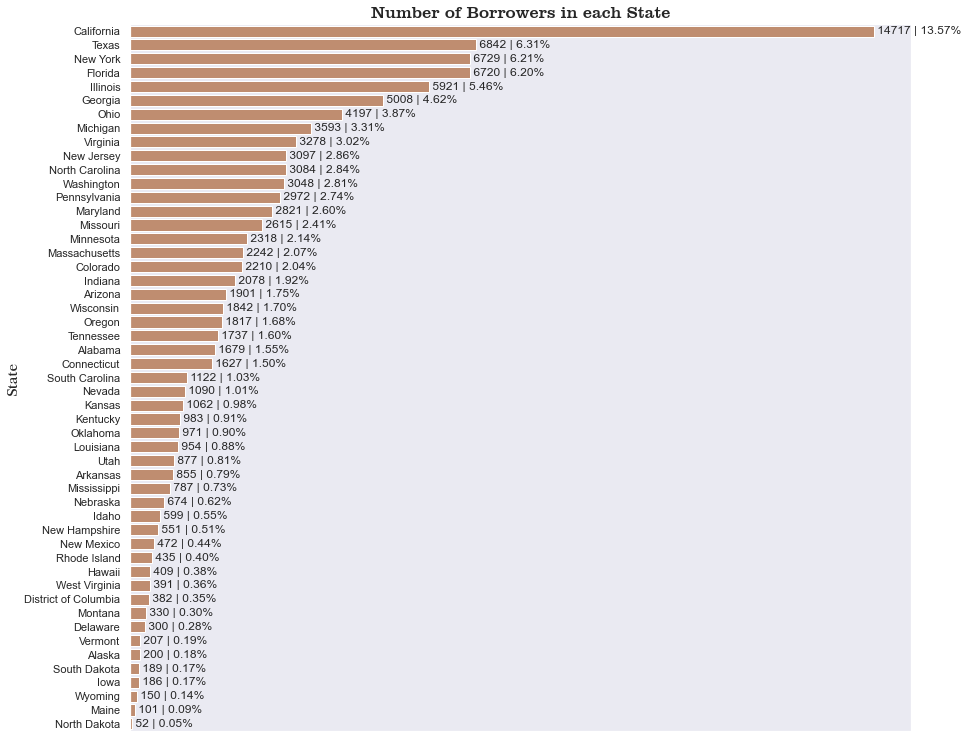

In [10]:
#set figure size
plt.figure(figsize=[14,13])

#count plot for borrowers in each state
Countplty(loan_clean['BorrowerState'], "Number of Borrowers in each State", '', "State")

The state with the most number of borrowers by a large margin is California which had more than 13% of the loans taken. The next state is Texas which had 6.3% of the total borrowers. After that, we have New York and Florida

## Number of Individuals that take loans in each income range

> The income range is from \\$0 - \\$100,000+. It is usefull to know how many individuals 

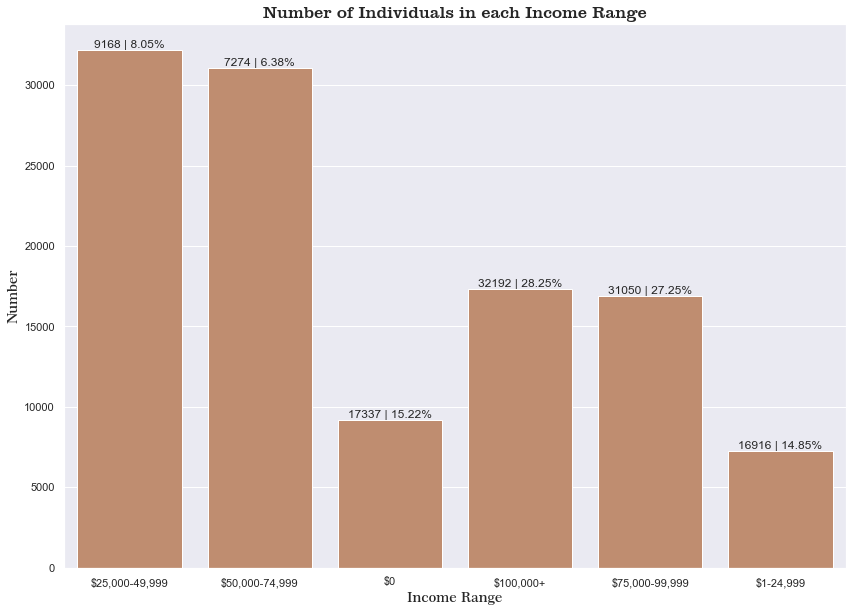

In [11]:
plt.figure(figsize=[14,10])

#count plot for individuals in each income range
Countpltx(loan_clean['IncomeRange'], 'Number of Individuals in each Income Range', 'Income Range', 'Number')

Most loans were taken by individuals within the \\$25,000-49,99 and \\$50,000-74,999 income range. This implies that most individuals that take loans are from mid-range income class. Income class below \\$24,999 generally have lower numbers of individuals with loans. This could mean that individuals in lower income class are not given loans or don't take loans.

## Distribution of Monthly Loan Payment and Borrower's Rate

> A distribution can easily be seen using a Histogram. I plotted a histogram to see the distribution of monthly loan payment and borrower's interest rate

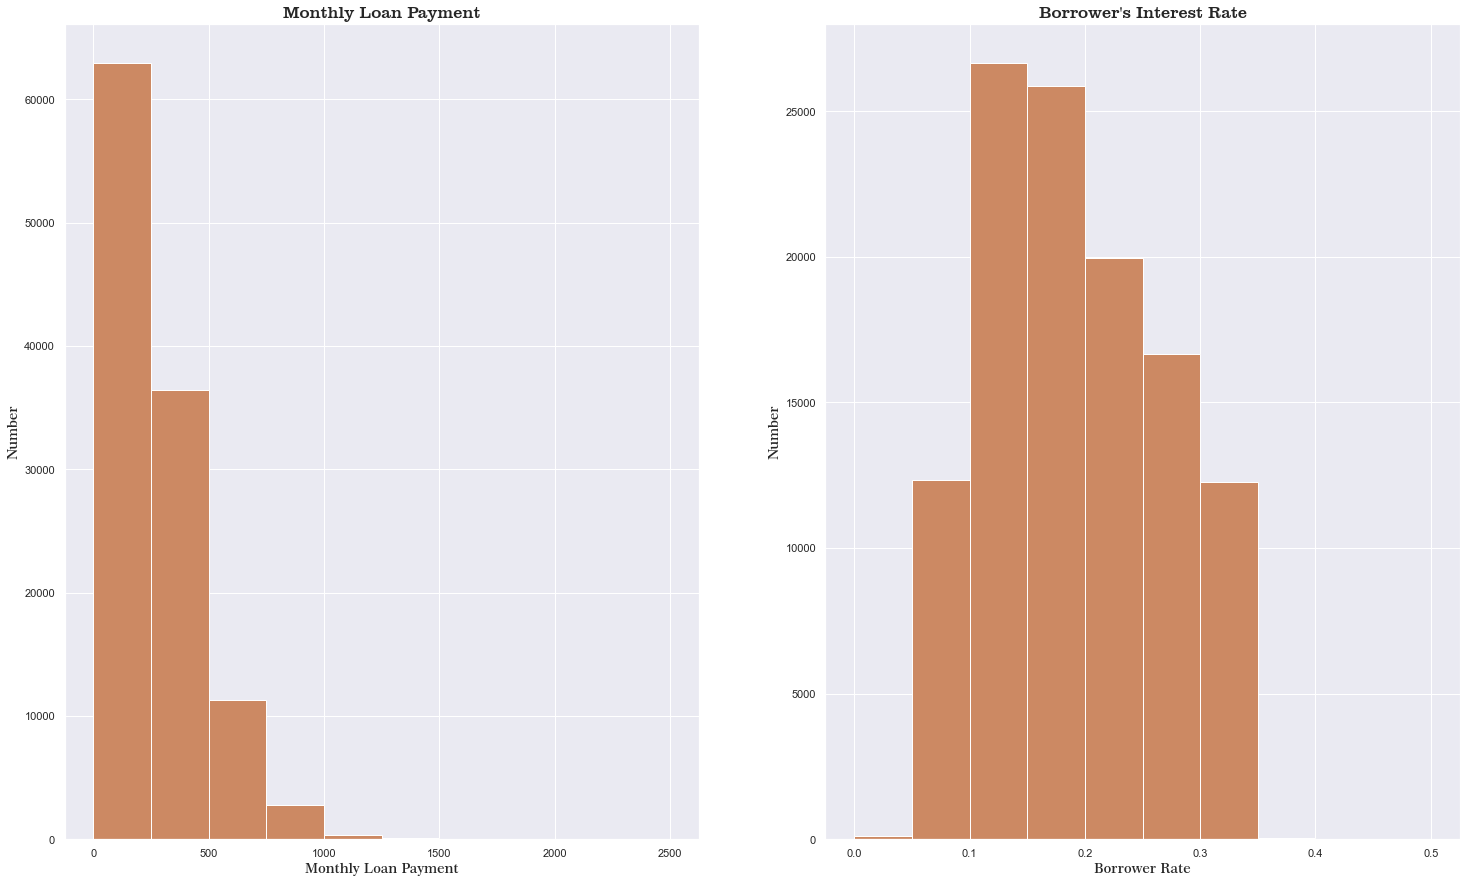

In [12]:
#set figure size
plt.figure(figsize=[25,15])

#histogram for monthly loan payment and borrower's interest rate
Histplt(1, 'MonthlyLoanPayment', 'Monthly Loan Payment', 'Monthly Loan Payment', 'Number', 0, 250)
Histplt(2, 'BorrowerRate', 'Borrower\'s Interest Rate', 'Borrower Rate', 'Number', 0, 0.05)

A majority of monthly loan payment is between \\$0 and \\$250. The other individuals pay between \\$250 and \\$1000 with just a few paying above that.
Typically the borrower's interest ranges between 0.1 and 0.35. It peaks between 0.1 and 0.15. 

## Relationship between Income Range, Employment Status and Borrower's Interest Rate

>It is expected that people with higher income range would have access to less interest rate and those employed would also have less interesst rate. 


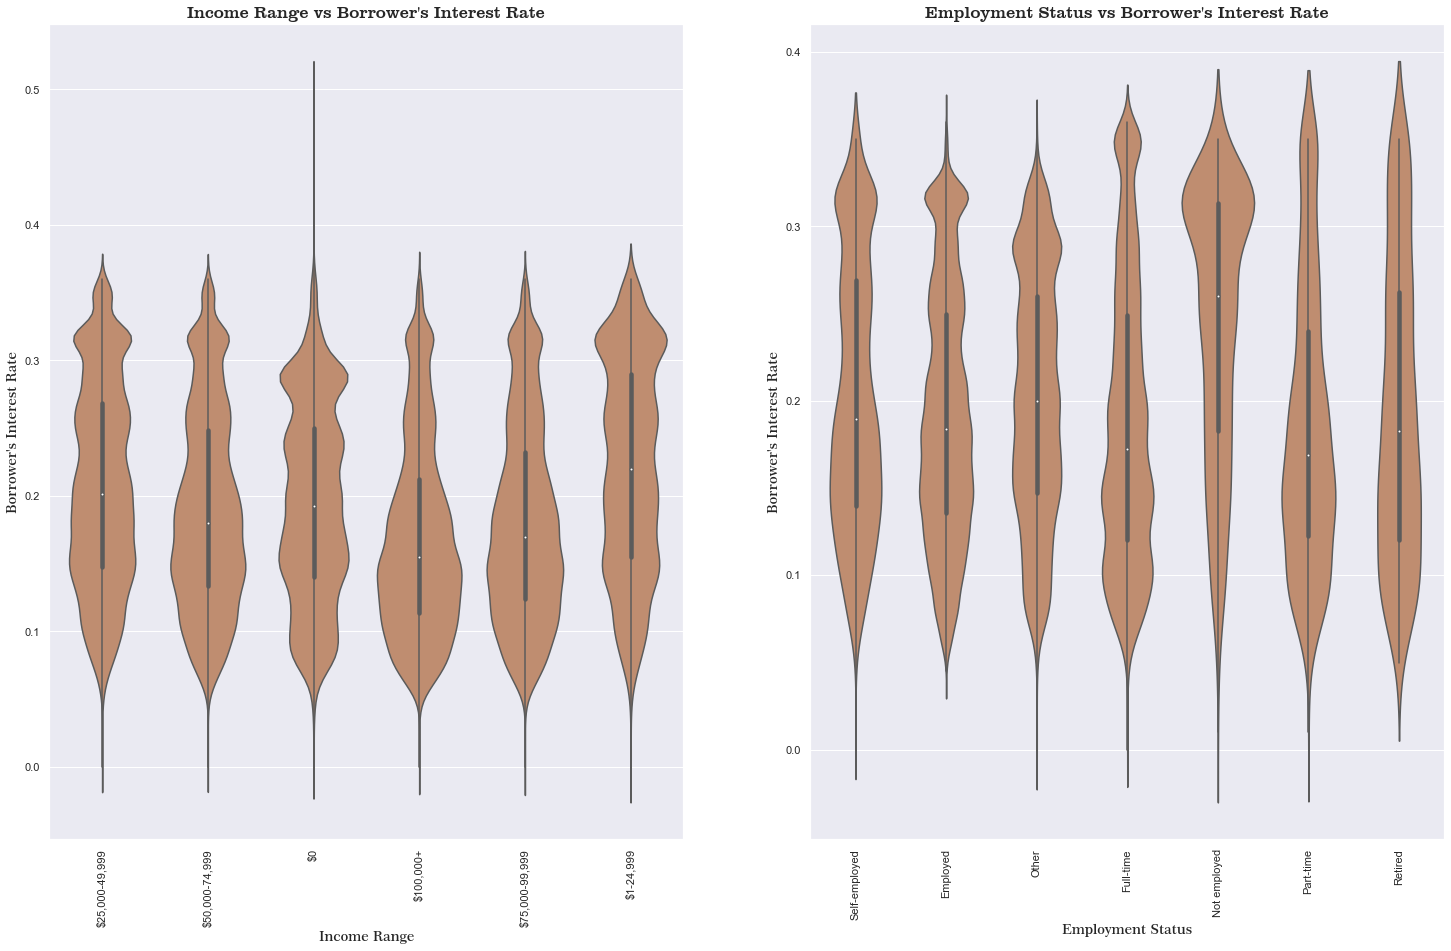

In [13]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between income range and borrower's interest rate
BV_plot(1, sns.violinplot, 'IncomeRange', 'BorrowerRate', 'Income Range vs Borrower\'s Interest Rate', 'Income Range', 'Borrower\'s Interest Rate')

#relationship between employment status and borrower's interest rate
BV_plot(2, sns.violinplot, 'EmploymentStatus', 'BorrowerRate', 'Employment Status vs Borrower\'s Interest Rate', 'Employment Status', 'Borrower\'s Interest Rate')

On the violin plot of the income range and borrower's interest rate, the higher the income range, the lower the borrower's interest rate and the range with the highest borrower's interest rate is the \\$1-24,999 range.
Interest rate seems to be the highest in the not employed status although there less interest rate in the part-time and retired group than in the other groups. Further investigation would be done in the multivariate exploration section

## Interest rate yearly progression for home owners and non-home owners
> Could there be any form of difference between those that have homes and those that dont?

In [14]:
loan_clean['LoanOriginationDate'] = loan_clean['LoanOriginationDate'].astype('datetime64')

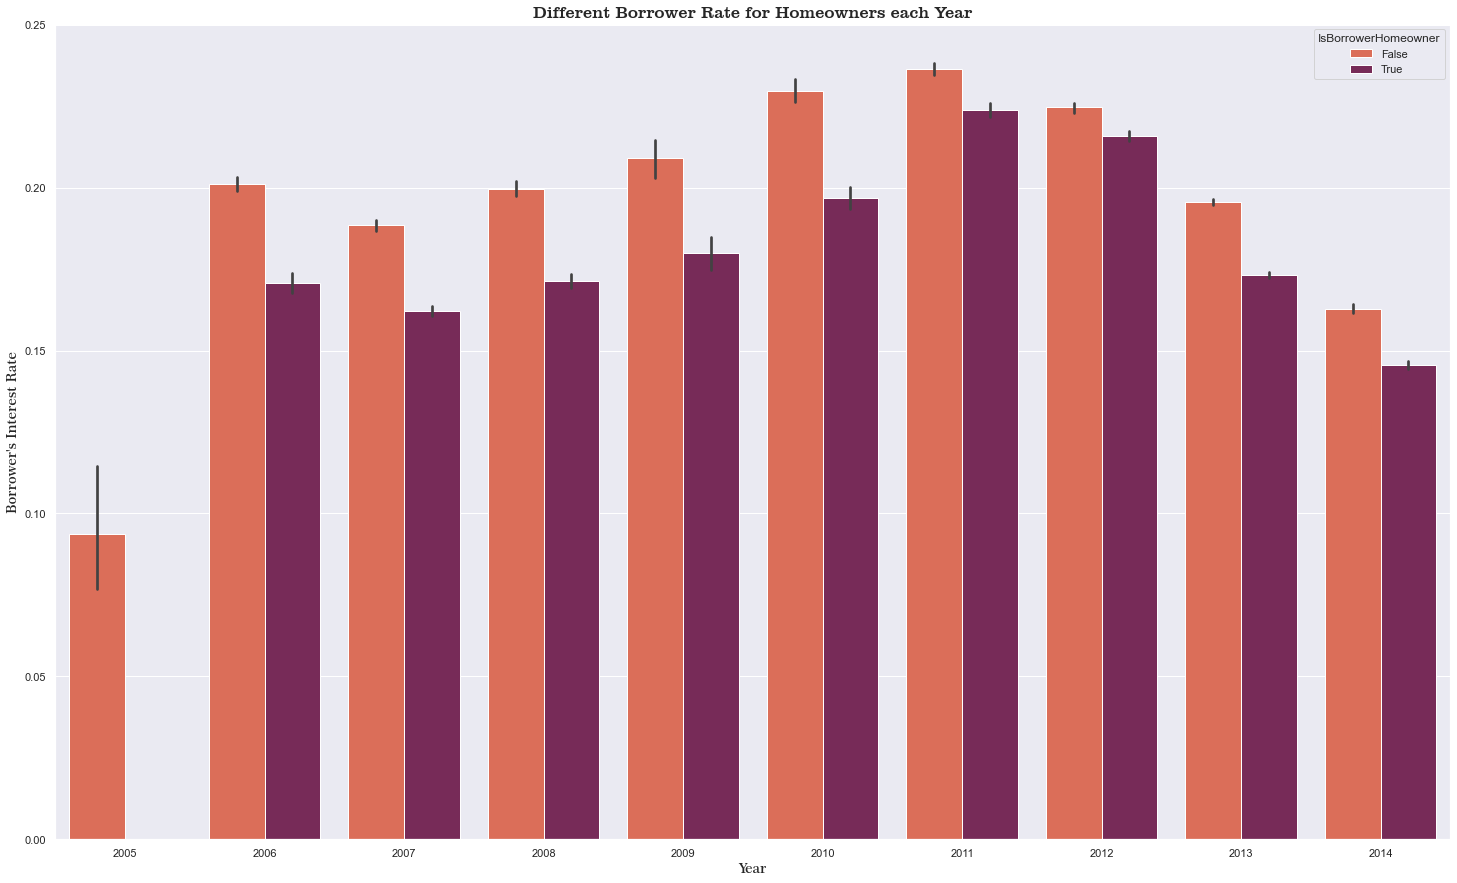

In [15]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between year, borrower's interest rate, and being a home owner
Barplt(plt.subplot(1,1,1), loan_clean['LoanOriginationDate'].dt.year, 'BorrowerRate', 'IsBorrowerHomeowner', 'Different Borrower Rate for Homeowners each Year', 'Year', 'Borrower\'s Interest Rate')

Interest rate has been on an increase before declining in 2013 and 2014. In general, home owners have lower interest rate than those that don't own homes. Interestingly, the standard deviation seem to reduce as the years progress. This means that there little variation in the amount of interest rate in later years.

## Relationship between Income Range, Employment Status, Interest Rate and Loan Term
> It would be safe to think that shorter term and higher income range would reduce the interest rate of the borrower. This may not necessarily be so. 

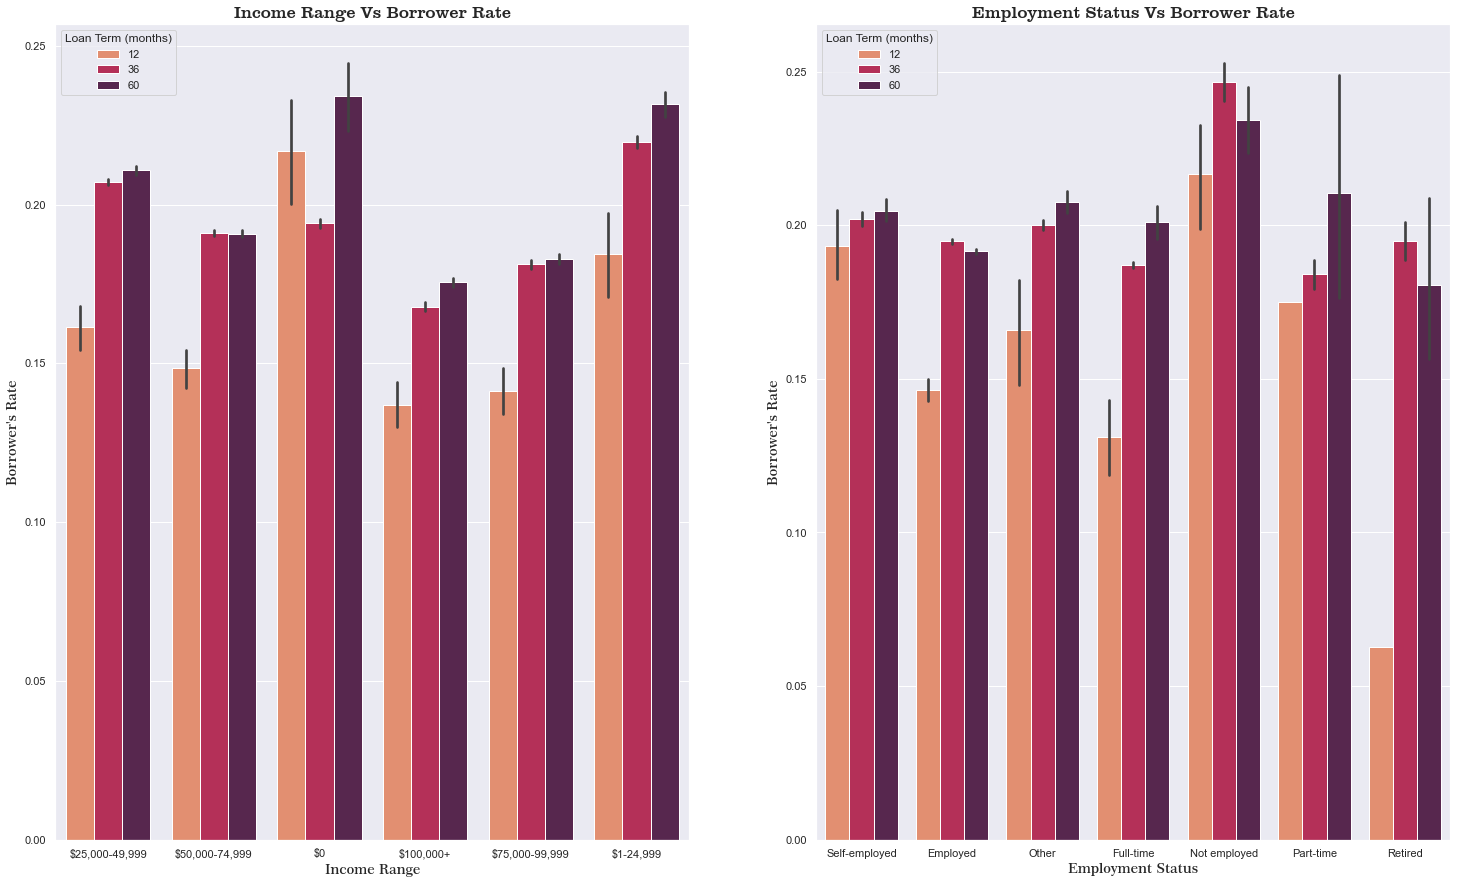

In [16]:
#setting the figure size
plt.figure(figsize=[25,15])

#relationship between income range, interest rate and loan term
Barplt(plt.subplot(1,2,1), 'IncomeRange', 'BorrowerRate', 'Term', 'Income Range Vs Borrower Rate', 'Income Range', 'Borrower\'s Rate')
plt.legend(title='Loan Term (months)')

#relationship between employment status, interest rate and loan term
Barplt(plt.subplot(1,2,2), 'EmploymentStatus', 'BorrowerRate', 'Term', 'Employment Status Vs Borrower Rate', 'Employment Status', 'Borrower\'s Rate')
plt.legend(title='Loan Term (months)');

There's a general trend of Borrower's Interest rate going up with lowering income range and increasing loan term. The highest Interest rate belong to those in the \\$0 income range and 60 months or 5 year loan period. The lowest interest rate belong to those earning more than \\$100,000 with a 12 month or 1 year loan period.
In terms of employment status, those that are retired and are taking a 12 month or 1 year loan have the least interest while those that are not employed have the highest interest rate with those taking a 36 month or 3 year loan having the highest interest rate. Individuals that are Employed and full time generally had less interest rate.

## Relationship between Employment Status, Prosper Rating, Income Range, and Interest Rate


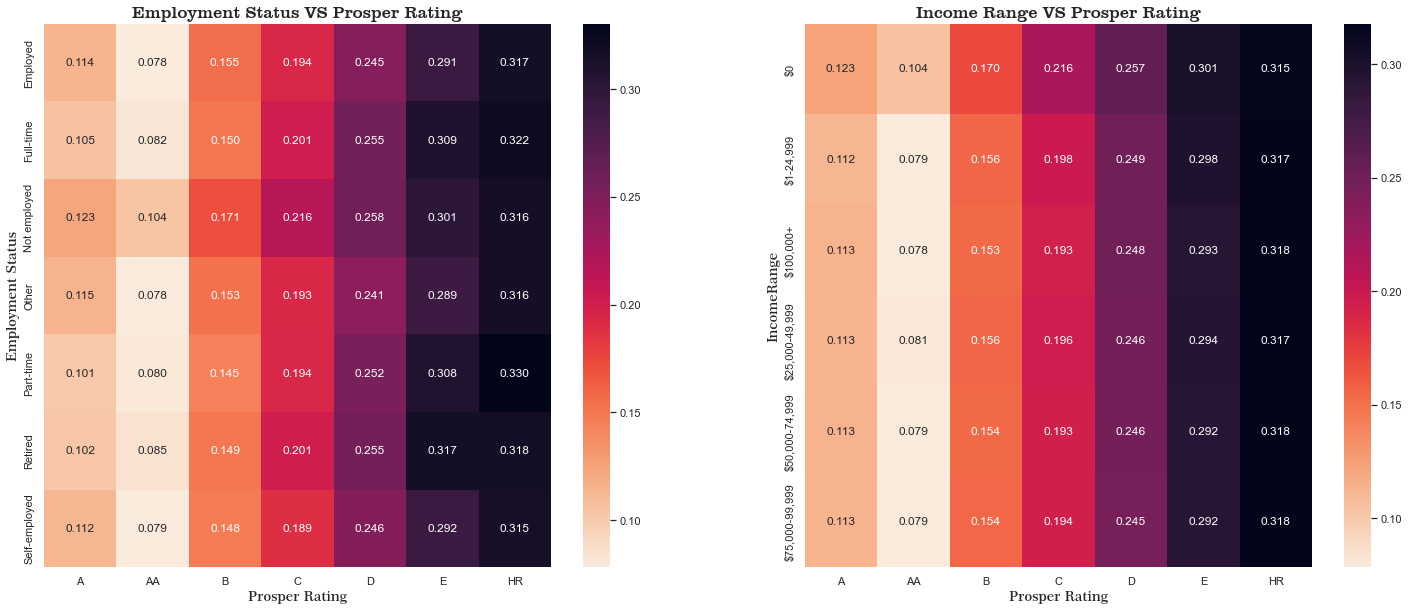

In [17]:
#setting the figure size
plt.figure(figsize=[25,10])

#heatmap showing the relationship between employment status, prosper rating and the borrower's interest rate
Heatmapplt(plt.subplot(1,2,1), 'EmploymentStatus', 'ProsperRating', 'BorrowerRate', 'Employment Status VS Prosper Rating', 'Prosper Rating', 'Employment Status')

#heatmap showing the relationship between income range, prosper rating and the borrower's interest rate
Heatmapplt(plt.subplot(1,2,2), 'IncomeRange', 'ProsperRating', 'BorrowerRate', 'Income Range VS Prosper Rating', 'Prosper Rating', 'IncomeRange')

From both graphs, it is evident that the higher the risk, the higher the interest rate, irrespective of the employment status or income range of the individual. There are points that slightly stand out. Individuals that are not employed tend to have higher interest rate across all the ratings and so do individuals in the \\$0 income range. Also retired individuals with 'E' ratings tend to get higher interest rate than other employment status with 'E' rating

## Conclusions
> After analysing the borrower's interest rate against all useable variables, I discovered that the people with the most advantage are people that are employed, have homes, are deemed low risk, have a higher income range and access one year loans. They get the lowest interest rate and are likely to get higher loan amounts.

In [18]:
!jupyter nbconvert Part_2_slides.ipynb --to slides --post serve --no-input --no-prompt